In [1]:
import numpy as np
import torch
import numpy as np  
import matplotlib.pyplot as plt
from torch.autograd import Variable
import torch.nn as nn
from collections import Counter

In [2]:
import pywt
from feature_extraction import feature_extraction
from sklearn.utils import shuffle

In [3]:
from fsiamese import SiameseNetworkf

In [4]:
from csiamese import SiameseNetworkc

In [5]:
from fsiamese_res import SiameseNetworkfres

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from fsiamese_res import SiameseNetworkfres

In [8]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans

In [9]:
import sklearn.metrics as metrics

In [10]:
from siamese import SiameseNetwork1d

In [11]:
from sklearn.metrics import classification_report

In [12]:
from sklearn import datasets, metrics, svm

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
from sklearn import preprocessing

In [16]:
def load_and_shuffle_data(train_data_file, train_label_file, train_data_full_file, test_data_full_file, train_label_full_file, test_label_full_file):
    train_data = np.load(train_data_file, allow_pickle=True)
    train_label = np.load(train_label_file, allow_pickle=True)
    train_data, train_label = shuffle(train_data, train_label, random_state=17)

    train_data_full = np.load(train_data_full_file, allow_pickle=True)
    test_data_full = np.load(test_data_full_file, allow_pickle=True)
    train_label_full = np.load(train_label_full_file, allow_pickle=True)
    test_label_full = np.load(test_label_full_file, allow_pickle=True)

    train_data_full, train_label_full = shuffle(train_data_full, train_label_full, random_state=17)
    test_data_full, test_label_full = shuffle(test_data_full, test_label_full, random_state=17)

    train_label_full = np.array(train_label_full, 'uint8')
    test_label_full = np.array(test_label_full, 'uint8')

    return train_data, train_label, train_data_full, test_data_full, train_label_full, test_label_full

In [17]:
train_data_s, train_label_s, train_data_full_s, test_data_full_s, train_label_full_s, test_label_full_s = load_and_shuffle_data(
    'train_data_set1_6_supination.npy',
    'train_label_set1_6_supination.npy',
    'train_data_set1_7_supination.npy',
    'test_data_set1_7_supination.npy',
    'train_label_set1_7_supination.npy',
    'test_label_set1_7_supination.npy'
)

In [18]:
train_data_e, train_label_e, train_data_full_e, test_data_full_e, train_label_full_e, test_label_full_e = load_and_shuffle_data(
    'train_data_set1_6_extension.npy',
    'train_label_set1_6_extension.npy',
    'train_data_set1_7_extension.npy',
    'test_data_set1_7_extension.npy',
    'train_label_set1_7_extension.npy',
    'test_label_set1_7_extension.npy'
)

In [19]:
train_data_f, train_label_f, train_data_full_f, test_data_full_f, train_label_full_f, test_label_full_f = load_and_shuffle_data(
    'train_data_set1_6_flexion.npy',
    'train_label_set1_6_flexion.npy',
    'train_data_set1_7_flexion.npy',
    'test_data_set1_7_flexion.npy',
    'train_label_set1_7_flexion.npy',
    'test_label_set1_7_flexion.npy'
)

In [20]:
train_data_u, train_label_u, train_data_full_u, test_data_full_u, train_label_full_u, test_label_full_u = load_and_shuffle_data(
    'train_data_set1_6_ulnar.npy',
    'train_label_set1_6_ulnar.npy',
    'train_data_set1_7_ulnar.npy',
    'test_data_set1_7_ulnar.npy',
    'train_label_set1_7_ulnar.npy',
    'test_label_set1_7_ulnar.npy'
)

In [21]:
train_data_r, train_label_r, train_data_full_r, test_data_full_r, train_label_full_r, test_label_full_r = load_and_shuffle_data(
    'train_data_set1_6_radial.npy',
    'train_label_set1_6_radial.npy',
    'train_data_set1_7_radial.npy',
    'test_data_set1_7_radial.npy',
    'train_label_set1_7_radial.npy',
    'test_label_set1_7_radial.npy'
)

In [22]:
train_data_g, train_label_g, train_data_full_g, test_data_full_g, train_label_full_g, test_label_full_g = load_and_shuffle_data(
    'train_data_set1_6_grip.npy',
    'train_label_set1_6_grip.npy',
    'train_data_set1_7_grip.npy',
    'test_data_set1_7_grip.npy',
    'train_label_set1_7_grip.npy',
    'test_label_set1_7_grip.npy'
)

In [23]:
train_data_ab, train_label_ab, train_data_full_ab, test_data_full_ab, train_label_full_ab, test_label_full_ab = load_and_shuffle_data(
    'train_data_set1_6_abduction.npy',
    'train_label_set1_6_abduction.npy',
    'train_data_set1_7_abduction.npy',
    'test_data_set1_7_abduction.npy',
    'train_label_set1_7_abduction.npy',
    'test_label_set1_7_abduction.npy'
)

In [24]:
train_data_ad, train_label_ad, train_data_full_ad, test_data_full_ad, train_label_full_ad, test_label_full_ad = load_and_shuffle_data(
    'train_data_set1_6_adduction.npy',
    'train_label_set1_6_adduction.npy',
    'train_data_set1_7_adduction.npy',
    'test_data_set1_7_adduction.npy',
    'train_label_set1_7_adduction.npy',
    'test_label_set1_7_adduction.npy'
)

In [25]:
train_data_s, train_label_s, train_data_full_s, test_data_full_s, train_label_full_s, test_label_full_s = load_and_shuffle_data(
    'train_data_set1_6_supination.npy',
    'train_label_set1_6_supination.npy',
    'train_data_set1_7_supination.npy',
    'test_data_set1_7_supination.npy',
    'train_label_set1_7_supination.npy',
    'test_label_set1_7_supination.npy'
)

In [26]:
train_data_p, train_label_p, train_data_full_p, test_data_full_p, train_label_full_p, test_label_full_p = load_and_shuffle_data(
    'train_data_set1_6_pronation.npy',
    'train_label_set1_6_pronation.npy',
    'train_data_set1_7_pronation.npy',
    'test_data_set1_7_pronation.npy',
    'train_label_set1_7_pronation.npy',
    'test_label_set1_7_pronation.npy'
)

In [35]:
train_data = feature_extraction(train_data)

C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [36]:
import xgboost as xgb

In [37]:
clf = xgb.XGBClassifier(n_estimators=200)
clf.fit(train_data, train_label) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [38]:
per_tree_pred = clf.predict_proba(train_data)

In [39]:
per_tree_pred.shape

(5688, 6)

In [40]:
scaler = StandardScaler()
scaler = preprocessing.StandardScaler().fit(per_tree_pred)

In [41]:
def feature_extraction_tree(train_data):
    train_data_tree = clf.predict_proba(train_data)
   # train_data_tree=scaler.transform(per_tree_pred)
    train_data_tree=scaler.transform(train_data_tree)
    return train_data_tree

In [42]:
import random

In [43]:
input_dim = 6
hidden_dim1 = 196
hidden_dim2 = 459
hidden_dim3 = 244
hidden_dim4 = 220
output_dim = 3

epochs = 25
batchsize = 32

In [44]:
train_datasets = [train_data_e, train_data_f,train_data_u,train_data_r,train_data_g,train_data_ab,train_data_ad,train_data_s,train_data_p]
train_labels = [train_label_e, train_label_f,train_label_u,train_label_r,train_label_g,train_label_ab,train_label_ad,train_label_s,train_label_p]
train_data_fulls = [train_data_full_e, train_data_full_f,train_data_full_u,train_data_full_r,train_data_full_g,train_data_full_ab,train_data_full_ad,train_data_full_s,train_data_full_p]
train_label_fulls = [train_label_full_e, train_label_full_f, train_label_full_u,train_label_full_r,train_label_full_g,train_label_full_ab,train_label_full_ad,train_label_full_s,train_label_full_p]
test_data_fulls = [test_data_full_e, test_data_full_f, test_data_full_u,test_data_full_r,test_data_full_g,test_data_full_ab,test_data_full_ad,test_data_full_s,test_data_full_p]
test_label_fulls = [test_label_full_e, test_label_full_f, test_label_full_u,test_label_full_r,test_label_full_g,test_label_full_ab,test_label_full_ad,test_label_full_s,test_label_full_p]
for dataset_index, (train_data, train_label,train_data_full,train_label_full,test_data_full,test_label_full) in enumerate(zip(train_datasets, train_labels,train_data_fulls,train_label_fulls,test_data_fulls,test_label_fulls)):        
    print(f"Training on train_data{dataset_index + 1}...")
    model = SiameseNetworkc(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, hidden_dim4, output_dim, epochs, batchsize)
    train_data = feature_extraction(train_data)
    train_data = feature_extraction_tree(train_data)
    train_label=np.array(train_label,'uint8')
    model.fit(train_data, train_label)
    rows_by_class = model.split_data_by_class(train_data_full, train_label_full)
    add_class = rows_by_class[6]
    add_data = feature_extraction(add_class)
    add_data = feature_extraction_tree(add_data)
    add_data = add_data.tolist()
    new_class = random.sample(add_data, 8)
    model.add_class(new_class)
    test_data_full = feature_extraction(test_data_full)
    test_data_full = feature_extraction_tree(test_data_full)
    y_predict = model.predict(test_data_full)
    test_label_full=np.array(test_label_full,'uint8')
    target_names = ['0','1','2','3','4','5','6']
    print(classification_report(test_label_full, y_predict, target_names=target_names))
print("All models have been trained on all datasets.")

Training on train_data1...


C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


Epoch: 0	Batch: 0	Loss: 0.062411
Epoch: 1	Batch: 0	Loss: 0.000646
Epoch: 2	Batch: 0	Loss: 0.000014
Epoch: 3	Batch: 0	Loss: 0.000050
Epoch: 4	Batch: 0	Loss: 0.003129
Epoch: 5	Batch: 0	Loss: 0.000004
Epoch: 6	Batch: 0	Loss: 0.000001
Epoch: 7	Batch: 0	Loss: 0.000001
Epoch: 8	Batch: 0	Loss: 0.000001
Epoch: 9	Batch: 0	Loss: 0.000004
Epoch: 10	Batch: 0	Loss: 0.000005
Epoch: 11	Batch: 0	Loss: 0.000000
Epoch: 12	Batch: 0	Loss: 0.000003
Epoch: 13	Batch: 0	Loss: 0.000002
Epoch: 14	Batch: 0	Loss: 0.000002
Epoch: 15	Batch: 0	Loss: 0.000001
Epoch: 16	Batch: 0	Loss: 0.000000
Epoch: 17	Batch: 0	Loss: 0.000000
Epoch: 18	Batch: 0	Loss: 0.000000
Epoch: 19	Batch: 0	Loss: 0.000000
Epoch: 20	Batch: 0	Loss: 0.000000
Epoch: 21	Batch: 0	Loss: 0.000000
Epoch: 22	Batch: 0	Loss: 0.000009
Epoch: 23	Batch: 0	Loss: 0.000000
Epoch: 24	Batch: 0	Loss: 0.000000


C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

torch.Size([1, 4, 3])
torch.Size([6, 4, 3])
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       237
           1       1.00      1.00      1.00       237
           2       0.82      0.94      0.88       237
           3       0.88      0.86      0.87       237
           4       0.96      0.94      0.95       237
           5       0.89      0.85      0.87       237
           6       0.76      0.70      0.73       237

    accuracy                           0.89      1659
   macro avg       0.89      0.89      0.89      1659
weighted avg       0.89      0.89      0.89      1659

Training on train_data2...


C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


Epoch: 0	Batch: 0	Loss: 1.103867
Epoch: 1	Batch: 0	Loss: 0.138313
Epoch: 2	Batch: 0	Loss: 0.066949
Epoch: 3	Batch: 0	Loss: 0.210764
Epoch: 4	Batch: 0	Loss: 0.041315
Epoch: 5	Batch: 0	Loss: 0.019448
Epoch: 6	Batch: 0	Loss: 0.051712
Epoch: 7	Batch: 0	Loss: 0.042283
Epoch: 8	Batch: 0	Loss: 0.079082
Epoch: 9	Batch: 0	Loss: 0.102466
Epoch: 10	Batch: 0	Loss: 0.033755
Epoch: 11	Batch: 0	Loss: 0.027511
Epoch: 12	Batch: 0	Loss: 0.051428
Epoch: 13	Batch: 0	Loss: 0.007509
Epoch: 14	Batch: 0	Loss: 0.029788
Epoch: 15	Batch: 0	Loss: 0.048239
Epoch: 16	Batch: 0	Loss: 0.037376
Epoch: 17	Batch: 0	Loss: 0.106009
Epoch: 18	Batch: 0	Loss: 0.072619
Epoch: 19	Batch: 0	Loss: 0.021929
Epoch: 20	Batch: 0	Loss: 0.028698
Epoch: 21	Batch: 0	Loss: 0.001609
Epoch: 22	Batch: 0	Loss: 0.005978
Epoch: 23	Batch: 0	Loss: 0.039317
Epoch: 24	Batch: 0	Loss: 0.001719


C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

torch.Size([1, 4, 3])
torch.Size([6, 4, 3])
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       237
           1       0.66      0.51      0.58       237
           2       0.80      0.95      0.87       237
           3       0.70      0.89      0.78       237
           4       0.91      0.92      0.92       237
           5       0.93      0.81      0.86       237
           6       0.96      0.99      0.98       237

    accuracy                           0.84      1659
   macro avg       0.85      0.84      0.84      1659
weighted avg       0.85      0.84      0.84      1659

Training on train_data3...


C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


Epoch: 0	Batch: 0	Loss: 0.689424
Epoch: 1	Batch: 0	Loss: 0.023188
Epoch: 2	Batch: 0	Loss: 0.054292
Epoch: 3	Batch: 0	Loss: 0.011909
Epoch: 4	Batch: 0	Loss: 0.001086
Epoch: 5	Batch: 0	Loss: 0.194942
Epoch: 6	Batch: 0	Loss: 0.083112
Epoch: 7	Batch: 0	Loss: 0.039202
Epoch: 8	Batch: 0	Loss: 0.111046
Epoch: 9	Batch: 0	Loss: 0.249469
Epoch: 10	Batch: 0	Loss: 0.013044
Epoch: 11	Batch: 0	Loss: 0.008376
Epoch: 12	Batch: 0	Loss: 0.008242
Epoch: 13	Batch: 0	Loss: 0.026669
Epoch: 14	Batch: 0	Loss: 0.082801
Epoch: 15	Batch: 0	Loss: 0.015542
Epoch: 16	Batch: 0	Loss: 0.198880
Epoch: 17	Batch: 0	Loss: 0.009169
Epoch: 18	Batch: 0	Loss: 0.082021
Epoch: 19	Batch: 0	Loss: 0.000830
Epoch: 20	Batch: 0	Loss: 0.018915
Epoch: 21	Batch: 0	Loss: 0.109320
Epoch: 22	Batch: 0	Loss: 0.118091
Epoch: 23	Batch: 0	Loss: 0.014208
Epoch: 24	Batch: 0	Loss: 0.040740


C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

torch.Size([1, 4, 3])
torch.Size([6, 4, 3])
              precision    recall  f1-score   support

           0       0.95      0.78      0.86       237
           1       0.62      0.62      0.62       237
           2       1.00      1.00      1.00       237
           3       0.73      0.89      0.80       237
           4       0.96      0.93      0.94       237
           5       0.90      0.78      0.84       237
           6       0.85      0.95      0.90       237

    accuracy                           0.85      1659
   macro avg       0.86      0.85      0.85      1659
weighted avg       0.86      0.85      0.85      1659

Training on train_data4...


C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


Epoch: 0	Batch: 0	Loss: 0.664464
Epoch: 1	Batch: 0	Loss: 0.063444
Epoch: 2	Batch: 0	Loss: 0.021417
Epoch: 3	Batch: 0	Loss: 0.020785
Epoch: 4	Batch: 0	Loss: 0.011961
Epoch: 5	Batch: 0	Loss: 0.024601
Epoch: 6	Batch: 0	Loss: 14.645741
Epoch: 7	Batch: 0	Loss: 0.027531
Epoch: 8	Batch: 0	Loss: 0.015861
Epoch: 9	Batch: 0	Loss: 0.025382
Epoch: 10	Batch: 0	Loss: 0.035877
Epoch: 11	Batch: 0	Loss: 0.026994
Epoch: 12	Batch: 0	Loss: 0.005602
Epoch: 13	Batch: 0	Loss: 0.007885
Epoch: 14	Batch: 0	Loss: 0.005743
Epoch: 15	Batch: 0	Loss: 0.000230
Epoch: 16	Batch: 0	Loss: 0.042139
Epoch: 17	Batch: 0	Loss: 0.023662
Epoch: 18	Batch: 0	Loss: 0.002956
Epoch: 19	Batch: 0	Loss: 0.056970
Epoch: 20	Batch: 0	Loss: 0.063866
Epoch: 21	Batch: 0	Loss: 0.019278
Epoch: 22	Batch: 0	Loss: 0.003590
Epoch: 23	Batch: 0	Loss: 0.003698
Epoch: 24	Batch: 0	Loss: 0.000239


C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

torch.Size([1, 4, 3])
torch.Size([6, 4, 3])
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       237
           1       0.72      0.67      0.70       237
           2       0.98      1.00      0.99       237
           3       0.78      0.97      0.86       237
           4       0.99      0.93      0.96       237
           5       0.90      0.80      0.85       237
           6       0.80      0.85      0.82       237

    accuracy                           0.87      1659
   macro avg       0.87      0.87      0.87      1659
weighted avg       0.87      0.87      0.87      1659

Training on train_data5...


C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


Epoch: 0	Batch: 0	Loss: 0.013112
Epoch: 1	Batch: 0	Loss: 0.041971
Epoch: 2	Batch: 0	Loss: 0.004901
Epoch: 3	Batch: 0	Loss: 0.003814
Epoch: 4	Batch: 0	Loss: 0.051321
Epoch: 5	Batch: 0	Loss: 0.015544
Epoch: 6	Batch: 0	Loss: 0.017961
Epoch: 7	Batch: 0	Loss: 0.022289
Epoch: 8	Batch: 0	Loss: 0.047534
Epoch: 9	Batch: 0	Loss: 0.011177
Epoch: 10	Batch: 0	Loss: 0.037179
Epoch: 11	Batch: 0	Loss: 0.141175
Epoch: 12	Batch: 0	Loss: 0.255052
Epoch: 13	Batch: 0	Loss: 0.043680
Epoch: 14	Batch: 0	Loss: 0.032986
Epoch: 15	Batch: 0	Loss: 0.035036
Epoch: 16	Batch: 0	Loss: 0.021104
Epoch: 17	Batch: 0	Loss: 1.092838
Epoch: 18	Batch: 0	Loss: 0.878157
Epoch: 19	Batch: 0	Loss: 1.049261
Epoch: 20	Batch: 0	Loss: 0.001236
Epoch: 21	Batch: 0	Loss: 0.075396
Epoch: 22	Batch: 0	Loss: 0.000355
Epoch: 23	Batch: 0	Loss: 0.012163
Epoch: 24	Batch: 0	Loss: 0.010258


C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

torch.Size([1, 4, 3])
torch.Size([6, 4, 3])
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       237
           1       0.60      0.57      0.59       237
           2       0.99      1.00      1.00       237
           3       0.81      0.92      0.86       237
           4       0.72      0.90      0.80       237
           5       0.87      0.80      0.83       237
           6       1.00      0.93      0.96       237

    accuracy                           0.84      1659
   macro avg       0.85      0.84      0.84      1659
weighted avg       0.85      0.84      0.84      1659

Training on train_data6...


C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


Epoch: 0	Batch: 0	Loss: 1.025545
Epoch: 1	Batch: 0	Loss: 0.038777
Epoch: 2	Batch: 0	Loss: 0.014955
Epoch: 3	Batch: 0	Loss: 0.026577
Epoch: 4	Batch: 0	Loss: 0.015013
Epoch: 5	Batch: 0	Loss: 0.000440
Epoch: 6	Batch: 0	Loss: 0.017186
Epoch: 7	Batch: 0	Loss: 0.021321
Epoch: 8	Batch: 0	Loss: 0.043420
Epoch: 9	Batch: 0	Loss: 0.010939
Epoch: 10	Batch: 0	Loss: 0.022749
Epoch: 11	Batch: 0	Loss: 0.054484
Epoch: 12	Batch: 0	Loss: 0.004717
Epoch: 13	Batch: 0	Loss: 0.038253
Epoch: 14	Batch: 0	Loss: 0.018648
Epoch: 15	Batch: 0	Loss: 0.035248
Epoch: 16	Batch: 0	Loss: 0.065438
Epoch: 17	Batch: 0	Loss: 0.026747
Epoch: 18	Batch: 0	Loss: 0.094027
Epoch: 19	Batch: 0	Loss: 0.017390
Epoch: 20	Batch: 0	Loss: 0.042479
Epoch: 21	Batch: 0	Loss: 0.065880
Epoch: 22	Batch: 0	Loss: 0.172196
Epoch: 23	Batch: 0	Loss: 0.111500
Epoch: 24	Batch: 0	Loss: 0.030625


C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

torch.Size([1, 4, 3])
torch.Size([6, 4, 3])
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       237
           1       0.72      0.74      0.73       237
           2       0.97      1.00      0.99       237
           3       0.88      0.94      0.91       237
           4       0.72      0.88      0.79       237
           5       0.99      0.92      0.95       237
           6       0.93      0.77      0.84       237

    accuracy                           0.87      1659
   macro avg       0.88      0.87      0.87      1659
weighted avg       0.88      0.87      0.87      1659

Training on train_data7...


C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


Epoch: 0	Batch: 0	Loss: 0.326094
Epoch: 1	Batch: 0	Loss: 0.100075
Epoch: 2	Batch: 0	Loss: 0.013701
Epoch: 3	Batch: 0	Loss: 0.008607
Epoch: 4	Batch: 0	Loss: 0.043333
Epoch: 5	Batch: 0	Loss: 0.006398
Epoch: 6	Batch: 0	Loss: 0.020080
Epoch: 7	Batch: 0	Loss: 0.007084
Epoch: 8	Batch: 0	Loss: 0.015506
Epoch: 9	Batch: 0	Loss: 0.012294
Epoch: 10	Batch: 0	Loss: 0.033128
Epoch: 11	Batch: 0	Loss: 0.681313
Epoch: 12	Batch: 0	Loss: 0.021270
Epoch: 13	Batch: 0	Loss: 0.027754
Epoch: 14	Batch: 0	Loss: 0.007993
Epoch: 15	Batch: 0	Loss: 0.075778
Epoch: 16	Batch: 0	Loss: 0.024778
Epoch: 17	Batch: 0	Loss: 0.017918
Epoch: 18	Batch: 0	Loss: 0.017759
Epoch: 19	Batch: 0	Loss: 0.020478
Epoch: 20	Batch: 0	Loss: 0.017095
Epoch: 21	Batch: 0	Loss: 0.062518
Epoch: 22	Batch: 0	Loss: 0.037221
Epoch: 23	Batch: 0	Loss: 0.059185
Epoch: 24	Batch: 0	Loss: 0.068265


C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

torch.Size([1, 4, 3])
torch.Size([6, 4, 3])
              precision    recall  f1-score   support

           0       1.00      0.78      0.88       237
           1       0.73      0.60      0.66       237
           2       0.99      1.00      1.00       237
           3       0.86      0.95      0.90       237
           4       0.67      0.88      0.76       237
           5       0.99      0.93      0.96       237
           6       0.78      0.80      0.79       237

    accuracy                           0.85      1659
   macro avg       0.86      0.85      0.85      1659
weighted avg       0.86      0.85      0.85      1659

Training on train_data8...


C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


Epoch: 0	Batch: 0	Loss: 0.479845
Epoch: 1	Batch: 0	Loss: 0.016477
Epoch: 2	Batch: 0	Loss: 0.052450
Epoch: 3	Batch: 0	Loss: 0.082234
Epoch: 4	Batch: 0	Loss: 0.000964
Epoch: 5	Batch: 0	Loss: 0.088534
Epoch: 6	Batch: 0	Loss: 1.124596
Epoch: 7	Batch: 0	Loss: 0.026551
Epoch: 8	Batch: 0	Loss: 0.032411
Epoch: 9	Batch: 0	Loss: 0.023405
Epoch: 10	Batch: 0	Loss: 0.051139
Epoch: 11	Batch: 0	Loss: 0.010774
Epoch: 12	Batch: 0	Loss: 0.000383
Epoch: 13	Batch: 0	Loss: 0.141805
Epoch: 14	Batch: 0	Loss: 0.013416
Epoch: 15	Batch: 0	Loss: 0.071697
Epoch: 16	Batch: 0	Loss: 0.077229
Epoch: 17	Batch: 0	Loss: 0.026796
Epoch: 18	Batch: 0	Loss: 0.021388
Epoch: 19	Batch: 0	Loss: 0.004722
Epoch: 20	Batch: 0	Loss: 0.260641
Epoch: 21	Batch: 0	Loss: 0.040461
Epoch: 22	Batch: 0	Loss: 0.017839
Epoch: 23	Batch: 0	Loss: 0.043721
Epoch: 24	Batch: 0	Loss: 0.010030


C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

torch.Size([1, 4, 3])
torch.Size([6, 4, 3])
              precision    recall  f1-score   support

           0       0.99      0.80      0.89       237
           1       0.44      0.46      0.45       237
           2       0.99      1.00      1.00       237
           3       0.84      0.94      0.89       237
           4       0.60      0.92      0.72       237
           5       0.88      0.90      0.89       237
           6       0.60      0.27      0.38       237

    accuracy                           0.76      1659
   macro avg       0.76      0.76      0.75      1659
weighted avg       0.76      0.76      0.75      1659

Training on train_data9...


C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


Epoch: 0	Batch: 0	Loss: 1.534389
Epoch: 1	Batch: 0	Loss: 0.964407
Epoch: 2	Batch: 0	Loss: 0.025261
Epoch: 3	Batch: 0	Loss: 0.024175
Epoch: 4	Batch: 0	Loss: 0.012109
Epoch: 5	Batch: 0	Loss: 0.021140
Epoch: 6	Batch: 0	Loss: 0.010211
Epoch: 7	Batch: 0	Loss: 0.026958
Epoch: 8	Batch: 0	Loss: 0.052819
Epoch: 9	Batch: 0	Loss: 0.029820
Epoch: 10	Batch: 0	Loss: 0.117406
Epoch: 11	Batch: 0	Loss: 0.016636
Epoch: 12	Batch: 0	Loss: 0.002947
Epoch: 13	Batch: 0	Loss: 0.026794
Epoch: 14	Batch: 0	Loss: 0.027278
Epoch: 15	Batch: 0	Loss: 0.024558
Epoch: 16	Batch: 0	Loss: 0.065479
Epoch: 17	Batch: 0	Loss: 0.053921
Epoch: 18	Batch: 0	Loss: 0.087991
Epoch: 19	Batch: 0	Loss: 0.020472
Epoch: 20	Batch: 0	Loss: 0.075055
Epoch: 21	Batch: 0	Loss: 0.003846
Epoch: 22	Batch: 0	Loss: 0.017912
Epoch: 23	Batch: 0	Loss: 0.016682
Epoch: 24	Batch: 0	Loss: 0.014540


C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\.conda\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change fr

torch.Size([1, 4, 3])
torch.Size([6, 4, 3])
              precision    recall  f1-score   support

           0       0.90      0.74      0.81       237
           1       0.55      0.59      0.57       237
           2       0.99      1.00      1.00       237
           3       0.73      0.95      0.82       237
           4       0.64      0.91      0.75       237
           5       0.84      0.94      0.88       237
           6       0.61      0.16      0.25       237

    accuracy                           0.75      1659
   macro avg       0.75      0.75      0.73      1659
weighted avg       0.75      0.75      0.73      1659

All models have been trained on all datasets.


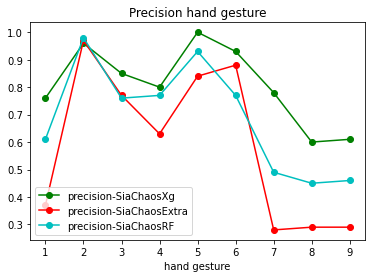

In [46]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5,6,7,8,9]
y1 = [0.76,0.96,0.85,0.80,1,0.93,0.78,0.60,0.61]
y2 = [0.37,0.97,0.77,0.63,0.84,0.88,0.28,0.29,0.29]
y3 = [0.61,0.98,0.76,0.77,0.93,0.77,0.49,0.45,0.46]

plt.plot(x, y1, label='precision-SiaChaosXg',color='g', marker='o')
plt.plot(x, y2, label='precision-SiaChaosExtra',color='r', marker='o')
plt.plot(x, y3, label='precision-SiaChaosRF',color='c', marker='o')
plt.title('Precision hand gesture')
plt.xlabel('hand gesture')


plt.legend()

plt.show()

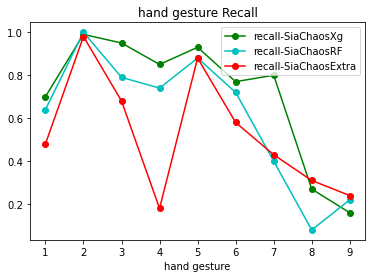

In [45]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5,6,7,8,9]
y1 = [0.70,0.99,0.95,0.85,0.93,0.77,0.80,0.27,0.16]
y2 = [0.64,1,0.79,0.74,0.88,0.72,0.40,0.08,0.22]
y3 = [0.48,0.98,0.68,0.18,0.88,0.58,0.43,0.31,0.24]

plt.plot(x, y1, label='recall-SiaChaosXg',color='g', marker='o')
plt.plot(x, y2, label='recall-SiaChaosRF',color='c', marker='o')
plt.plot(x, y3, label='recall-SiaChaosExtra',color='r', marker='o')
plt.title('hand gesture Recall')
plt.xlabel('hand gesture')


plt.legend()

plt.show()

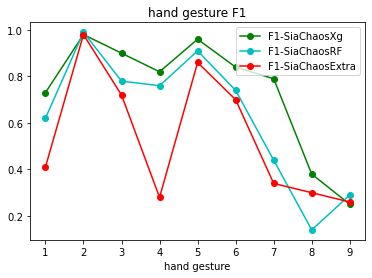

In [27]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5,6,7,8,9]
y1 = [0.73,0.98,0.90,0.82,0.96,0.84,0.79,0.38,0.25]
y2 = [0.62,0.99,0.78,0.76,0.91,0.74,0.44,0.14,0.29]
y3 = [0.41,0.98,0.72,0.28,0.86,0.70,0.34,0.30,0.26]

plt.plot(x, y1, label='F1-SiaChaosXg',color='g', marker='o')
plt.plot(x, y2, label='F1-SiaChaosRF',color='c', marker='o')
plt.plot(x, y3, label='F1-SiaChaosExtra',color='r', marker='o')
plt.title('hand gesture F1')
plt.xlabel('hand gesture')


plt.legend()

plt.show()